In [19]:
#задание 2 недели(№3)
import numpy as np
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
data_train = pandas.read_csv("perceptron-train.csv",header = None)
target_train=data_train.iloc[:,0]
priznaki_train=data_train.iloc[:,1:3]

data_test=pandas.read_csv("perceptron-test.csv",header = None)
target_test=data_test.iloc[:,0]
priznaki_test=data_test.iloc[:,1:3]


from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=241, max_iter=5, tol=None)
clf.fit(priznaki_train, target_train)
predictions = clf.predict(priznaki_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(target_test, predictions)
print(accuracy)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
priznaki_train_scaled = scaler.fit_transform(priznaki_train)
priznaki_test_scaled = scaler.transform(priznaki_test)

clf_as = Perceptron(random_state=241, max_iter=5, tol=None)
clf_as.fit(priznaki_train_scaled, target_train)
predictions_as = clf_as.predict(priznaki_test_scaled)
accuracy_as=accuracy_score(target_test, predictions_as)
print(accuracy_as)
print(accuracy_as-accuracy)


0.655
0.845
0.18999999999999995


C:\pyp2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\pyp2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [50]:
#задание 4 недели
import numpy as np
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import coo_matrix, hstack
data_train = pandas.read_csv("salary-train.csv")
data_test=pandas.read_csv("salary-test-mini.csv")
cnt=0
for i in data_train['FullDescription']:
    data_train['FullDescription'][cnt].lower()
    cnt+=1   
data_train['FullDescription'] = data_train['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)
vectorizer = TfidfVectorizer(min_df=5)
X_train = vectorizer.fit_transform(data_train['FullDescription'])
X_test=vectorizer.transform(data_test['FullDescription'])
data_train['LocationNormalized'].fillna('nan', inplace=True)
data_train['ContractTime'].fillna('nan', inplace=True)
enc = DictVectorizer()
X_train_categ = enc.fit_transform(data_train[['LocationNormalized', 'ContractTime']].to_dict('records'))
X_test_categ = enc.transform(data_test[['LocationNormalized', 'ContractTime']].to_dict('records'))
#объединяем преобразованнные столбцы признаков в одну матрицу
X_train_f=hstack([X_train,X_train_categ])
X_test_f=hstack([X_test,X_test_categ])
Y=data_train['SalaryNormalized']
clf = Ridge(alpha=1.0,random_state=241)
clf.fit(X_train_f, Y)
print(clf.predict(X_test_f))




[56555.61500155 37188.32442618]


In [158]:
import numpy as np
import pandas
from sklearn.decomposition import PCA
from numpy import corrcoef
data_train = pandas.read_csv("close_prices.csv")
X=data_train.iloc[:,1:36]
pca = PCA(n_components=10)
pca.fit(X) 
#вычисляем вклад в дисперсию каждой компоненты
print(pca.explained_variance_ratio_) 
#применяем построенное преобразование к исходным данным
t=pca.transform(X) 
#print(t[:,[0]])
#проверяем значение первого компонента
X_f=t[:,[0]]
X_f=X_f.T
#чекаем коэф корелляции между первой компонентой и индексом
index_info=pandas.read_csv("djia_index.csv")
ii=index_info.iloc[:,1]
ii=ii.T
coef_correlation=np.corrcoef(X_f,ii)
#смотрим какая компания внесла наибольший вклад
vesa=pca.components_[0]
max1=vesa[0]
cnt=0
sh=0
for i in vesa:
    if max1<i:
        max1=i
        sh=cnt+1
    cnt+=1

print(max1)        
print(sh)
print(data_train.columns)
print(data_train.columns[27])


[0.73897118 0.11007169 0.04995088 0.0287492  0.02215448 0.01931577
 0.00674853 0.00614091 0.00320594 0.00305611]
0.579683945747361
27
Index(['date', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE', 'GS',
       'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT',
       'NKE', 'PFE', 'PG', 'T', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM'],
      dtype='object')
V


In [191]:
#задание 5 недели
import numpy as np
import pandas
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
data=pandas.read_csv("abalone.csv")
target=data.iloc[:,8]
priznaki=data.iloc[:,0:8]
priznaki['Sex'] = priznaki['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
predictions=0
arr=np.arange(51)
cnt=0
shk=54
cv = KFold(n_splits=5, shuffle=True, random_state=1)
while cnt<51:
    clf = RandomForestRegressor(n_estimators=cnt+1, random_state=1)
    clf.fit(priznaki, target)
    predictions=clf.predict(priznaki)
    cross_val = np.mean(cross_val_score(clf,priznaki, target, cv=cv,scoring='r2'))
    arr[cnt]=cross_val
    if cross_val > 0.52:
        if shk>cnt+1:
            shk=cnt+1
    cnt+=1
print(shk)
print(arr)


IndexError: index 50 is out of bounds for axis 0 with size 50

      Iter       Train Loss   Remaining Time 
         1           1.0190           16.14s
         2           0.9192           16.20s
         3           0.8272           14.86s
         4           0.7834           15.76s
         5           0.7109           15.49s
         6           0.6368           15.57s
         7           0.5797           15.10s
         8           0.5610           14.39s
         9           0.5185           14.13s
        10           0.4984           14.24s
        20           0.1999           12.87s
        30           0.1313           12.23s
        40           0.0790           11.55s
        50           0.0511           10.80s
        60           0.0352           10.05s
        70           0.0245            9.30s
        80           0.0162            8.71s
        90           0.0114            8.09s
       100           0.0077            7.59s
       200           0.0004            2.16s


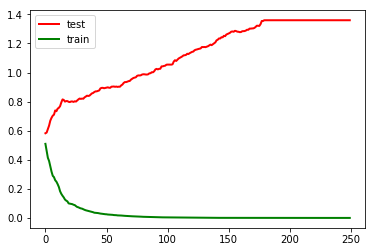

      Iter       Train Loss   Remaining Time 
         1           1.1255           18.63s
         2           1.0035           16.94s
         3           0.9386           16.09s
         4           0.8844           15.52s
         5           0.8381           15.25s
         6           0.7995           14.64s
         7           0.7559           14.06s
         8           0.7205           13.70s
         9           0.6958           13.86s
        10           0.6725           13.57s
        20           0.4672           12.03s
        30           0.3179           11.36s
        40           0.2274           10.81s
        50           0.1774           10.15s
        60           0.1394            9.63s
        70           0.1050            9.09s
        80           0.0805            8.51s
        90           0.0650            7.96s
       100           0.0511            7.46s
       200           0.0058            2.37s


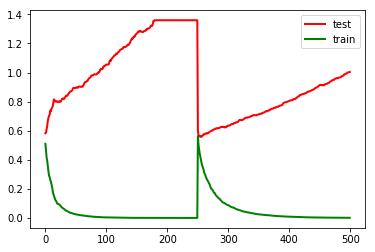

      Iter       Train Loss   Remaining Time 
         1           1.2095           18.38s
         2           1.1006           16.70s
         3           1.0240           15.52s
         4           0.9729           16.01s
         5           0.9387           14.81s
         6           0.8948           14.80s
         7           0.8621           14.51s
         8           0.8360           14.18s
         9           0.8171           14.18s
        10           0.7883           13.91s
        20           0.6164           11.86s
        30           0.4933           10.94s
        40           0.4248           10.19s
        50           0.3345            9.75s
        60           0.2760            9.30s
        70           0.2263            8.80s
        80           0.1971            8.24s
        90           0.1693            7.74s
       100           0.1388            7.39s
       200           0.0294            2.41s


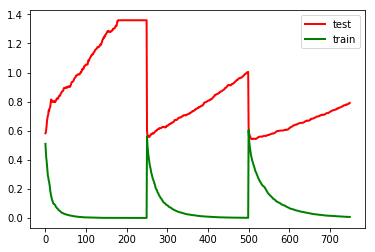

      Iter       Train Loss   Remaining Time 
         1           1.2613           19.87s
         2           1.1715           19.29s
         3           1.1009           17.98s
         4           1.0529           18.03s
         5           1.0130           17.30s
         6           0.9740           16.71s
         7           0.9475           16.34s
         8           0.9197           16.08s
         9           0.8979           15.44s
        10           0.8730           15.20s
        20           0.7207           12.62s
        30           0.6055           11.37s
        40           0.5244           10.47s
        50           0.4501            9.83s
        60           0.3908            9.23s
        70           0.3372            8.84s
        80           0.3009            8.42s
        90           0.2603            8.07s
       100           0.2327            7.87s
       200           0.0835            2.45s


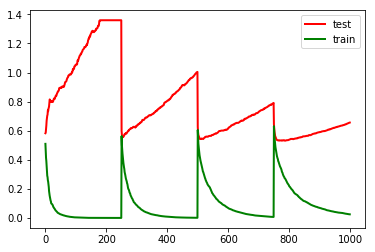

      Iter       Train Loss   Remaining Time 
         1           1.3199           18.63s
         2           1.2645           16.70s
         3           1.2170           16.09s
         4           1.1775           16.32s
         5           1.1404           16.32s
         6           1.1106           16.10s
         7           1.0844           16.31s
         8           1.0617           16.11s
         9           1.0411           15.89s
        10           1.0223           15.80s
        20           0.8864           14.66s
        30           0.7844           13.04s
        40           0.7176           11.91s
        50           0.6590           10.93s
        60           0.6120           10.08s
        70           0.5599            9.53s
        80           0.5242            8.85s
        90           0.4829            8.80s
       100           0.4473            8.23s
       200           0.2379            2.58s


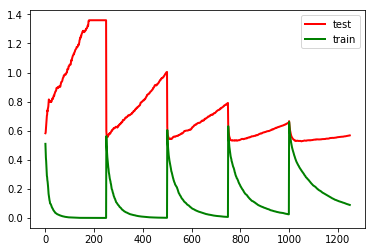

      Iter       Train Loss   Remaining Time 
         1           1.2613           20.61s
         2           1.1715           18.30s
         3           1.1009           17.41s
         4           1.0529           17.73s
         5           1.0130           17.25s
         6           0.9740           16.87s
         7           0.9475           16.10s
         8           0.9197           16.50s
         9           0.8979           16.29s
        10           0.8730           16.23s
        20           0.7207           13.29s
        30           0.6055           12.18s
        40           0.5244           11.52s
        50           0.4501           10.78s
        60           0.3908           10.18s
        70           0.3372            9.55s
        80           0.3009            9.16s
        90           0.2603            8.59s
       100           0.2327            8.07s
       200           0.0835            2.62s
0.531094637596885
786
36


In [260]:
#задание 5 неделя №2
import numpy as np
import pandas
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
data=pandas.read_csv("gbm-data.csv").values
test_loss = []
train_loss = []

min_ll=1900
X_train, X_test, Y_train, Y_test = train_test_split(data[:,1:], data[:,0], test_size=0.8, random_state=241)
arr=[1, 0.5, 0.3, 0.2, 0.1]
cnt=0
iter_=0
for i in arr:
    clf = GradientBoostingClassifier( n_estimators=250,verbose=True,random_state=241,learning_rate=i)
    clf.fit(X_train, Y_train)
    a=clf.staged_decision_function(X_test)
    b=clf.staged_decision_function(X_train)
    for y_pred in clf.staged_decision_function(X_test):
        log_loss1=log_loss(Y_test,1.0 / (1.0 + np.exp(-y_pred)))
        test_loss.append(log_loss(Y_test, 1.0 / (1.0 + np.exp(-y_pred))))
        iter_+=1   
        if i==0.2:
            if log_loss1 < min_ll:
                min_ll=log_loss1
                cnt=iter_           
            
    for y_pred in clf.staged_decision_function(X_train):
        train_loss.append(log_loss(Y_train, 1.0 / (1.0 + np.exp(-y_pred))))
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()

def get_loss(clf, X, y):
    loss = []
    # Используйте метод staged_decision_function для предсказания качества
    # на обучающей и тестовой выборке на каждой итерации.
    for y_pred in clf.staged_decision_function(X):
        # Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции
        # sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики
        #  и номер итерации, на которой оно достигается.
        loss.append(log_loss(y, 1.0 / (1.0 + np.exp(-y_pred))))

    min_iter = np.argmin(loss)
    min_loss = loss[min_iter]
    return min_iter, min_loss
clf = GradientBoostingClassifier( n_estimators=250,verbose=True,random_state=241,learning_rate=0.2)
clf.fit(X_train, Y_train)
cnt1=0
cnt1,min_ll=get_loss(clf,X_test,Y_test)    
cnt=test_loss.index(min_ll)        
print(min_ll)
print(cnt)  
print(cnt1)




In [263]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=36,random_state=241)
data=pandas.read_csv("gbm-data.csv").values
clf.fit(X_train,Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(data[:,1:], data[:,0], test_size=0.8, random_state=241)
y_pred=clf.predict_proba(X_test)
log_loss1=log_loss(Y_test,y_pred)
print(log_loss1)

0.5415685811957381


      Iter       Train Loss   Remaining Time 
         1           1.2613           16.90s
         2           1.1715           15.96s
         3           1.1009           15.69s
         4           1.0529           16.26s
         5           1.0130           16.03s
         6           0.9740           15.86s
         7           0.9475           15.10s
         8           0.9197           15.03s
         9           0.8979           15.01s
        10           0.8730           14.91s
        20           0.7207           12.33s
        30           0.6055           11.65s
        40           0.5244           11.05s
        50           0.4501           10.36s
        60           0.3908            9.83s
        70           0.3372            9.26s
        80           0.3009            8.75s
        90           0.2603            8.33s
       100           0.2327            7.73s
       200           0.0835            2.39s
0
0


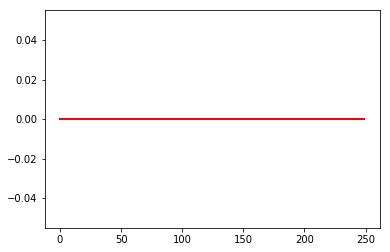

In [251]:
data = pandas.read_csv('gbm-data.csv')
Y = data[data.columns[0]].values
X = data[data.columns[1:]].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=241)
# train_loss = np.arange(1, 251)
test_loss = np.arange(1, 251)
booster = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2, random_state=241, verbose=True)
booster.fit(X_train, Y_train)
#for i, y_pred_train in enumerate(booster.staged_predict_proba(X_train)):
   # train_loss[i] = metrics.log_loss(Y_train, y_pred_train)
for m, y_decision in enumerate(booster.staged_decision_function(X_test)):
    y_pred_test = 1.0/(1.0 + np.exp(-y_decision))
    test_loss[m] = log_loss(Y_test, y_pred_test)
print(test_loss.max())
print(test_loss.min())
plt.figure()
# plt.plot(train_loss, 'g', linewidth=2)
plt.plot(test_loss, 'r', linewidth=2)
#plt.legend(['train', 'test'])
plt.show()

In [5]:
import numpy as np
import pandas
from sklearn.svm import SVC
data=pandas.read_csv("svm-data.csv", header=None)
target=data.iloc[:,0]
priznaki=data.iloc[:,1:3]
clf = SVC(kernel='linear',random_state=241,C=100000)
clf.fit(priznaki,target)
print(clf.support_)

[3 4 9]


In [48]:
import numpy as np
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )
#вычисление TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups.data)
X_test=vectorizer.transform(newsgroups.data)
#подбор параметров
grid = {'C': np.power(10.0, np.arange(-5, 5))}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = svm.SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X_train, newsgroups.target)
#вычисляем, какой параметр C при наилучшей оценке качества кросс-валидации
C_best=gs.best_estimator_.C
clf1 = SVC(kernel='linear',random_state=241,C=C_best)
#обучаем с лучшим параметром C
clf.fit(X_test,newsgroups.target)
top10idx = np.array(clf.coef_.indices)[np.abs(np.array(clf.coef_.data)).argsort()[-10:]]
#arr_coef=clf.coef_.toarray()[0]
#idx = (abs(arr_coef)).argsort()[:10]
feature_mapping = vectorizer.get_feature_names()
for i in top10idx:
    print(feature_mapping[i])
   

commiting
rdb
decreace
decreased
rcst1a06465
rcst1a06450
rcst1a06435
decreed
rcst1a06420
rcst1a06415


In [195]:
#задание №3 неделя 3
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime
data=pandas.read_csv("data-logistic.csv", header=None)
target=data.iloc[:,0]
priznaki=data.iloc[:,1:3]


In [229]:
import numpy as np
import pandas
from sklearn.linear_model import LogisticRegression
import math
from sklearn.metrics import roc_auc_score
data=pandas.read_csv("data-logistic.csv", header=None)
target=data.iloc[:,0]
pr_1=data.iloc[:,1]
pr_2=data.iloc[:,2]
w1=0.0
w2=0.0
k=0.1
C=0
def Sigmoid(a):
    s=1.0/(1+ math.exp(-a))
    return(s)
def Sigmoid_vector(a):
    s=1.0/(1+ np.exp(-a))
    return(s)
for i in range(10000):
    
    #выбрать объект из выборки
    #рассчитать потерю
    #сделать шаг в весах
    #оценить функционал Q
    #проверить евклидово расстояние
    #пока не сойдется Q - повторять
    w1_new=w1+ np.mean((0.1*(1-Sigmoid_vector(target*(w1*pr_1+w2*pr_2)))*(target*pr_1)))-k*C*w1
    w2_new=w2+ np.mean((0.1*(1-Sigmoid_vector(target*(w1*pr_1+w2*pr_2)))*(target*pr_2)))-k*C*w2
    if (np.sqrt(np.square(w1-w1_new)+np.square(w2_new-w2))<= (10e-5)) :
        break
    ugdn=[]
    for ic in range(len(pr_1)):
        t=Sigmoid(w1*pr_1[ic]+w2*pr_2[ic])
        ugdn.append(t)
    w2=w2_new
    w1=w1_new
C=10
w1=0
w2=0
for i in range(10000):
    
    #выбрать объект из выборки
    #рассчитать потерю
    #сделать шаг в весах
    #оценить функционал Q
    #проверить евклидово расстояние
    #пока не сойдется Q - повторять
    w1_new=w1+ np.mean((0.1*(1-Sigmoid_vector(target*(w1*pr_1+w2*pr_2)))*(target*pr_1)))-k*C*w1
    w2_new=w2+ np.mean((0.1*(1-Sigmoid_vector(target*(w1*pr_1+w2*pr_2)))*(target*pr_2)))-k*C*w2
    if (np.sqrt(np.square(w2-w2_new)+np.square(w1-w1_new))<= (10e-5)) :
        print(w2,w1)
        break
    ugdn_reg=[]
    for ic in range(len(pr_1)):
        t=Sigmoid(w1*pr_1[ic]+w2*pr_2[ic])
        ugdn_reg.append(t)
    w2=w2_new
    w1=w1_new
    
print(roc_auc_score(target, ugdn))
print(roc_auc_score(target, ugdn_reg))
    
    


0.024819781681715933 0.02859493642710939
0.927142857142857
0.9363809523809522


In [193]:
#задание 4 неделя 3
import numpy as np
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
data=pandas.read_csv("classification.csv")
true=data.iloc[:,0]
pred=data.iloc[:,1]
cnt=1
tp=0
fp=0
tn=0
fn=0
arr_true=np.array(len(true))
arr_pred=np.array(len(pred))
print(len(true))
while cnt<len(true) :
    if (true[cnt]==pred[cnt] and true[cnt]=='1'):
            tp+=1
    if (true[cnt]==pred[cnt] and true[cnt]=='0'):
            tn+=1
    if (true[cnt]!=pred[cnt] and true[cnt]=='0'):
            fp+=1
    if (true[cnt]!=pred[cnt] and true[cnt]=='1'):
            fn+=1
    cnt+=1

print(accuracy_score(true, pred))
print(precision_score(true, pred))
print(recall_score(true, pred))
print(f1_score(true, pred))
scores_data=pandas.read_csv("scores.csv")
y_true = scores_data.iloc[:,0]
y_scores_lr =scores_data.iloc[:,1]
y_scores_svm = scores_data.iloc[:,2]
y_scores_knn = scores_data.iloc[:,3]
y_scores_tree = scores_data.iloc[:,4]
print(roc_auc_score(y_true, y_scores_lr))
print(roc_auc_score(y_true, y_scores_svm))
print(roc_auc_score(y_true, y_scores_knn))
print(roc_auc_score(y_true, y_scores_tree))
precision, recall, thresholds = precision_recall_curve(y_true, y_scores_lr)
pr=np.array(len(precision))
cnt=0
max=precision[0]
for i in precision:
    if(recall[cnt]>=0.7 and i>max):
        max=i
    cnt+=1  
print("Последнее задание")
print(max)
precision2, recall2, thresholds2 = precision_recall_curve(y_true, y_scores_svm)
pr2=np.array(len(precision2))
cnt=0
max2=precision2[0]
for i in precision2:
    if(recall2[cnt]>=0.7 and i>max2):
        max2=i
    cnt+=1    
print(max2)
precision3, recall3, thresholds3 = precision_recall_curve(y_true, y_scores_knn)
pr3=np.array(len(precision3))
cnt=0
max3=precision3[0]
for i in precision3:
    if(recall3[cnt]>=0.7 and i>max3):
        max3=i
    cnt+=1    
print(max3)
precision4, recall4, thresholds4 = precision_recall_curve(y_true, y_scores_tree)
pr4=np.array(len(precision4))
cnt=0
max4=precision4[0]
for i in precision4:
    if(recall4[cnt]>=0.7 and i>max4):
        max4=i
    cnt+=1    
print(max4)
        
    


200
0.535
0.5584415584415584
0.4215686274509804
0.48044692737430167
0.719187675070028
0.7086834733893557
0.6351540616246498
0.6919267707082833
Последнее задание
0.6302521008403361
0.6228070175438597
0.6065573770491803
0.6517857142857143


In [172]:
import numpy as np
arr=np.array([1,-2,90,54,11,3,45])
idx = (abs(arr).argsort()[:3]
print(idx)

SyntaxError: invalid syntax (<ipython-input-172-58297d16b1a3>, line 4)

In [215]:
tygr=[]
tygr.append(5)
print(tygr)

[5]
